___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/v2/resize:fit:592/1*i0o8mjFfCn-uD79-F1Cqkw.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2024
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://miro.medium.com/v2/resize:fit:592/1*i0o8mjFfCn-uD79-F1Cqkw.png</p>

### <font color= #2E9AFE> Tema: Modelos basados en Árboles Parte II - Clasificación</font>

### Bosques Aleatorios

"Los árboles tienen un sólo aspecto que previene que sean la herramienta ideal para el aprendizaje predictivo, que es la **inexactitud**" 

Pasos para crear un bosque aleatorio:
- Crear un dataset "bootstrapped" con reemplazo
- Crear un árbol de decisión usando el dataset "bootstrapped", pero sólo usar un subconjunto aleatorio de variables (o columnas) en cada paso. 
- Regresar al paso 1. y repetir 

Gracias al proceso de bootstrapping, el requerimento de dividir los datos en prueba y entrenamiento no es tan estricto. Se recomienda dividir los datos en prueba y entrenamiento cuando se quiere comparar su desempeño contra otros modelos. 


**Hiperparámetros:**
- max_depth: Puedo limitar hasta qué profundidad quiero que crezca cada árbol en mi bosque aleatorio.
- min_sample_split: le indica al árbol el número mínimo de observaciones requeridas en cualquier nodo dado para dividirlo.
- min_samples_leaf: le indica al árbol el número mínimo de observaciones requeridas en la hoja final.
- n_estimators: numero de árboles

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.metrics import (accuracy_score,precision_score,recall_score)
import time

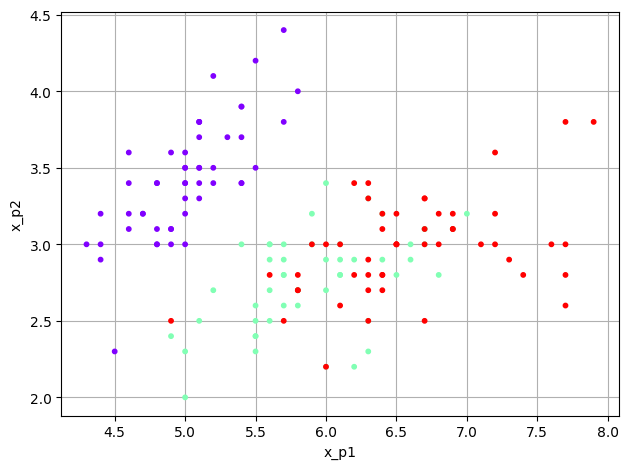

In [2]:
#Importar la base de datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target

plt.scatter(X[:,0],X[:,1], c=Y, s=10, cmap=plt.cm.rainbow,zorder=2)
plt.xlabel('x_p1')
plt.ylabel('x_p2')
plt.grid()
plt.tight_layout()
plt.show()

In [3]:
X.shape

(150, 4)

In [4]:
X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [5]:
#Distribucion de la variable de salida
unique_values = np.unique(Y)
counts = np.bincount(Y)
 
print("Valores:", unique_values)
print("Cuenta:", counts[unique_values])

Valores: [0 1 2]
Cuenta: [50 50 50]


In [6]:
from sklearn.model_selection import train_test_split
#dividimos nuestros datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=0,
                                                    shuffle=True, stratify=Y)

In [7]:
#%% Construccion y entrenamiento de la bolsa de modelos
modelo = RandomForestClassifier(n_estimators=100, #número de árboles en el bosque
                               criterion='gini', 
                               max_depth=10, #profundidad
                               min_samples_split=2,
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

start_time = time.time()
modelo = modelo.fit(X_train,y_train) # entrenamiento con la bolsa de modelos
print("--- %s seconds ---" % (time.time() - start_time))
Yhat = modelo.predict(X_test) #predicción con la bolsa de modelos

--- 0.04207801818847656 seconds ---


In [8]:
# Evaluacion del modelo
accu = accuracy_score(y_test,Yhat)
prec = precision_score(y_test,Yhat,average='weighted')#añadir weighted cuando es problema multiclase
reca = recall_score(y_test,Yhat,average='weighted')
print('Accuracy\t Precision\t Recall\n %0.3f\t %0.3f\t %0.3f'%(accu,prec,reca))

Accuracy	 Precision	 Recall
 0.933	 0.944	 0.933


### GridsearchCV para tunear hiperarámetros

Utilicemos cross validation para optimizar hiperparámetros. 

Antes de hacer el GridsearchCV vamos viendo los hiperparámetros cómo se desarrollan contra las métricas de performance para elegir la mejor malla de valores

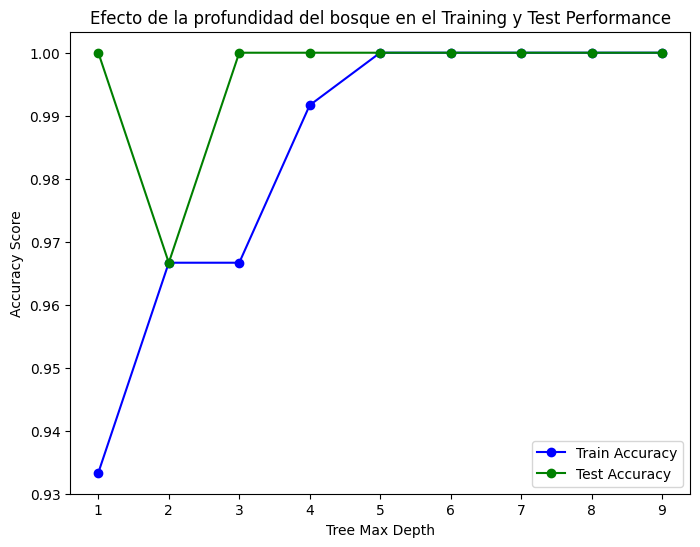

In [9]:
#graficamos la profundidad vs el accuracy
max_depths = range(1, 10)
train_scores = []
test_scores = []

for max_depth in max_depths:
    tree_clas = RandomForestClassifier(max_depth=max_depth, random_state=42)
    tree_clas.fit(X_train, y_train)
    train_scores.append(tree_clas.score(X_train, y_train))
    test_scores.append(tree_clas.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(max_depths, train_scores, label='Train Accuracy', color='blue', marker='o')
plt.plot(max_depths, test_scores, label='Test Accuracy', color='green', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Efecto de la profundidad del bosque en el Training y Test Performance')
plt.legend()
plt.show()


Podríamos probar la malla con 2 profundidades

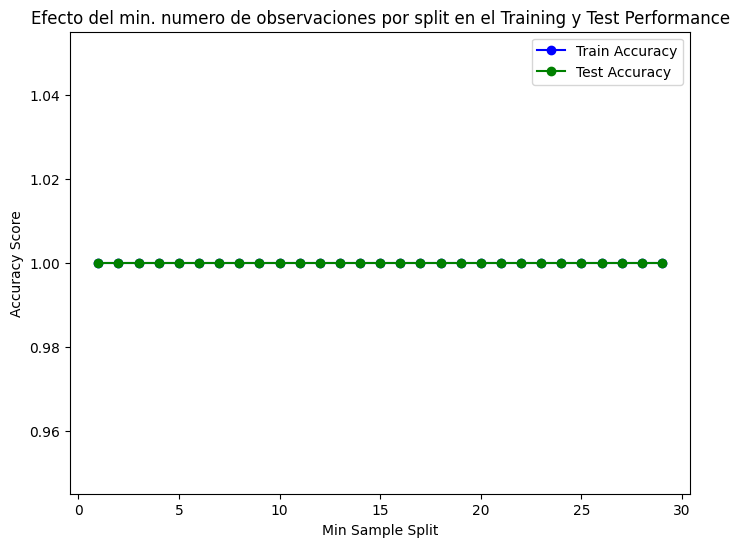

In [11]:
#graficamos el min_sample_split vs el accuracy
min_samples_splits = range(1, 30)
train_scores = []
test_scores = []

for min_samples_split in min_samples_splits:
    tree_clas = RandomForestClassifier(min_samples_split=2, random_state=42)
    tree_clas.fit(X_train, y_train)
    train_scores.append(tree_clas.score(X_train, y_train))
    test_scores.append(tree_clas.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(min_samples_splits, train_scores, label='Train Accuracy', color='blue', marker='o')
plt.plot(min_samples_splits, test_scores, label='Test Accuracy', color='green', marker='o')
plt.xlabel('Min Sample Split')
plt.ylabel('Accuracy Score')
plt.title('Efecto del min. numero de observaciones por split en el Training y Test Performance')
plt.legend()
plt.show()

Podríamos probar la malla entre 27 y 30 min num observaciones por split

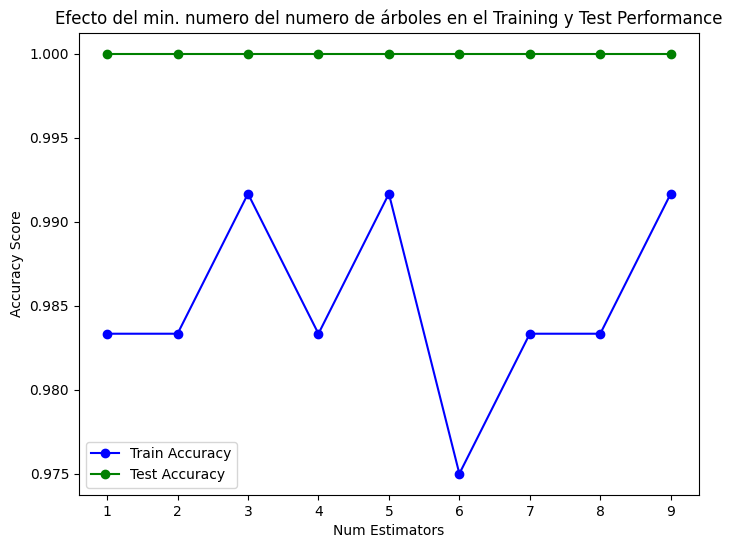

In [12]:
#graficamos el n_estimators vs el accuracy
n_estimators = range(1, 10)
train_scores = []
test_scores = []

for n_estimator in n_estimators:
    tree_clas = RandomForestClassifier(n_estimators=n_estimator, random_state=42)
    tree_clas.fit(X_train, y_train)
    train_scores.append(tree_clas.score(X_train, y_train))
    test_scores.append(tree_clas.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(n_estimators, train_scores, label='Train Accuracy', color='blue', marker='o')
plt.plot(n_estimators, test_scores, label='Test Accuracy', color='green', marker='o')
plt.xlabel('Num Estimators')
plt.ylabel('Accuracy Score')
plt.title('Efecto del min. numero del numero de árboles en el Training y Test Performance')
plt.legend()
plt.show()

Podríamos probar la malla con 1 y 2 árboles

In [13]:
#Usando cross validation y grid search
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(criterion='gini',
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

gs = GridSearchCV(model,
                  param_grid = {'max_depth': [2], #profundidad máxima
                                'min_samples_split': range(27, 30, 1), #minimo numero de observaciones por split
                                'n_estimators': range(1,2,1)}, # número de árboles en el bosque
                  cv=2,
                  scoring='accuracy')
#Entrenamiento
gs.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(min_samples_leaf=2,
                                              random_state=0),
             param_grid={'max_depth': [2], 'min_samples_split': range(27, 30),
                         'n_estimators': range(1, 2)},
             scoring='accuracy')

In [14]:
#Imprimir parámetros óptimos
print(gs.best_params_)

{'max_depth': 2, 'min_samples_split': 27, 'n_estimators': 1}


In [15]:
#crear modelo usando parámetros óptimos
new_model = RandomForestClassifier(n_estimators=1,
                               criterion='gini',
                               max_depth=2,
                               min_samples_split=27,
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Entrenamiento
new_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=27,
                       n_estimators=1, random_state=0)

In [16]:
# Evaluacion del modelo
yhat = new_model.predict(X_test)
accu = accuracy_score(y_test,yhat)
prec = precision_score(y_test,yhat,average='weighted')
reca = recall_score(y_test,yhat,average='weighted')
print('Accuracy\t Precision\t Recall\n %0.3f\t %0.3f\t %0.3f'%(accu,prec,reca))

Accuracy	 Precision	 Recall
 0.967	 0.970	 0.967


In [17]:
#importancia de las variables
import pandas as pd
feature_imp = pd.Series(new_model.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.628832
petal length (cm)    0.371168
sepal length (cm)    0.000000
sepal width (cm)     0.000000
dtype: float64

/var/folders/dq/1njx2tc93b54ss7jz6qmrgk40000gn/T/ipykernel_7704/1832713392.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


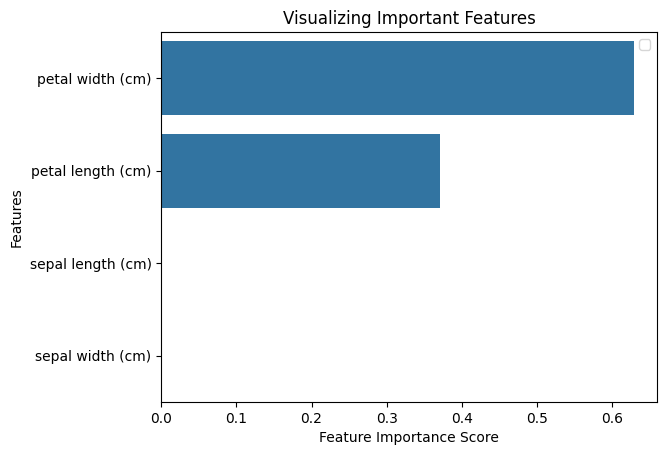

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.legend()
plt.show()

**Ventajas**

- Son muy buenos generalizando
- Protejen en contra del sobreajuste (overfitting) gracias a la construcción del bootstrapping 
- También reducen la varianza y por lo tanto mejoran la precisión del modelo
- Funcionan muy bien con variables categóricas y variables continuas
- No se requiere escalamiento previo de variables 
- Manejan muy bien el hecho de que haya datos nulos
- Son modelos robustos ante valores atípicos (outliers)
- Son algoritmos muy estables, cuando hay datos nuevos, el algoritmo no se ve muy afectado. Ya que este nuevo dato puede afectar a un árbol individual, pero es difícil que impacte a todos los árboles. 

**Desventajas**

- Complejidad. Los bosques aleatorios crean muchos árboles y combina sus resultados. Requiere mucho poder computacional y recursos 
- Periodos de entrenamiento largos. Requieren más tiempo de entrenamiento. 